#### Task 1
* Create a human mobility network for MA using the provided csv file.
- network node: individual census block group (neighborhood) in MA
- network edge: residents from one neighborhood visiting another
- weight of network tie: percentage of residents from one neighborhood visiting another
* How many nodes and edges are there in your network?

In [1]:
#Task 1
import os
import pandas as pd
import networkx as nx

os.chdir('/Users/[editted]/Desktop/compsoc/data/MA_cbg_human_mobility_2019')
df = pd.read_csv('MA_cbg2cbg_2019_01.csv', low_memory=False)
#df

G = nx.Graph() #create an empty network
for i in range(len(df)):
    origin_cbg = df.loc[i, 'poi_cbg']
    destination_cbg = df.loc[i, 'visitor_census_tract']
    total_residents_in_origin = df.loc[i, 'raw_device_counts']
    num_visitor = df.loc[i, 'visitor_count']
    percent_visitor = num_visitor / total_residents_in_origin
    G.add_edge(origin_cbg, destination_cbg, weight=percent_visitor)
print(nx.info(G))

Graph with 40292 nodes and 742299 edges


/var/folders/ml/2z7dml2d3vn2rqmr8h2sw_n40000gn/T/ipykernel_1919/246637326.py:18: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


**Task 1 Conclusion**
* There are 40292 nodes and 742299 edges in the network.

#### Task 2
* Calculate weighted node degree and unweighted node degree for each census block group in the mobility network and use the results to create a pandas dataframe. The dataframe should have three columns. One column stores the census block group id, and the other two the two calculated node degrees.

In [2]:
#Task 2
node_list = list(G.nodes())
degree_df = pd.DataFrame(node_list)
degree_df = degree_df.rename(columns={0: 'census_block_group_id'})

unweighted_degree = []
weighted_degree = []
for node in G.nodes():
    uneweighted = G.degree(node)
    unweighted_degree.append(uneweighted)
    weighted = G.degree(node, weight='weight')
    weighted_degree.append(weighted)

degree_df = degree_df.join(pd.DataFrame({'weighted_node_degree': weighted_degree}))
degree_df = degree_df.join(pd.DataFrame({'unweighted_node_degree': unweighted_degree}))
degree_df

,census_block_group_id,weighted_node_degree,unweighted_node_degree
0,250250303003,1.617298,2936
1,250251010016,1.829781,609
2,440070008003,0.201907,77
3,250250923002,2.675362,600
4,250173686001,1.763752,3217
...,...,...,...
40287,170318261003,0.000726,1
40288,120310144111,0.000726,1
40289,530330294073,0.000726,1
40290,360610165001,0.000726,1


#### Task 3
* Create a plot that visualizes the distribution of the weighted node degrees. Is the human mobility network a scale-free network? In other words, does the degree distribution follow a power law?

array([[<AxesSubplot:title={'center':'weighted_node_degree'}>]],
      dtype=object)

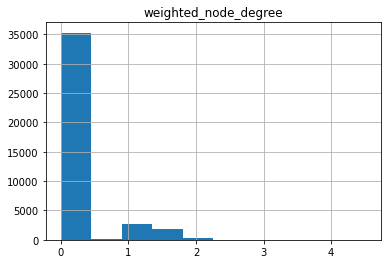

In [3]:
 #Task 3
degree_df.hist(column=['weighted_node_degree'])

**Task 3 Conclusion**
* Yes, the human mobility network is a scale-free network, since the distribution follows the power law (the fraction P(k) of nodes in the network having k connections to other nodes decreases exponentially as k increases).

#### Bonus task
* Does this network follow the “six degrees of separation” principle? Find out ways to analyze the network to answer this question.

In [4]:
#Bonus Task
import networkx as nx
import matplotlib.pyplot as plt

path_length = []
node_list = list(G.nodes())

for u in node_list:
    for v in node_list:
        if u != v:
            length = nx.shortest_path_length(G, u, v)
            print('Shortest path between', u, 'and', v, 'is of length', length)
            path_length.append(length)

plt.hist(path_length)
plt.xlabel('shortest path length')
plt.ylabel('Frequency')
plt.show()

Shortest path between 250250303003 and 250251010016 is of length 1
Shortest path between 250250303003 and 440070008003 is of length 1
Shortest path between 250250303003 and 250250923002 is of length 1
Shortest path between 250250303003 and 250173686001 is of length 1
Shortest path between 250250303003 and 250173502005 is of length 1
Shortest path between 250250303003 and 201550018002 is of length 1
Shortest path between 250250303003 and 481130019001 is of length 1
Shortest path between 250250303003 and 250173425001 is of length 1
Shortest path between 250250303003 and 250251706011 is of length 1
Shortest path between 250250303003 and 250250701014 is of length 1
Shortest path between 250250303003 and 90091702003 is of length 1
Shortest path between 250250303003 and 250259817001 is of length 1
Shortest path between 250250303003 and 250251204001 is of length 1
Shortest path between 250250303003 and 250250203032 is of length 1
Shortest path between 250250303003 and 250250501013 is of lengt


KeyboardInterrupt



**Bonus Task Conclusion**
* The amount of data is so large that it takes a long time to complete the whole calculation. It can be found from the calculation that no shortest length exceeds 6, so the network follows the "six degree of separation".